# Generating Line Flux Maps

In [2]:
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy import wcs

import matplotlib.pyplot as plt

from hetdex_tools.interpolate import make_narrowband_image
from hetdex_tools.phot_tools import fit_circular_aperture

In [3]:
%matplotlib inline

## Make a collapased wavelength image at the line detection wavelength and coordinate

In [4]:
detectid=4025994600# 3004616956
hdu = make_narrowband_image(detectid=detectid, 
                            include_error=True, 
                            imsize=20.*u.arcsec,
                            convolve_image=False,
                           survey='hdr4',
                           apply_mask=True,
                           interp_kind='linear')

In [5]:
im = hdu[0].data
w = wcs.WCS(hdu[0].header)

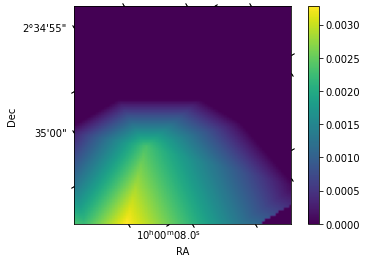

In [6]:
plt.subplot(111, projection=w)
plt.imshow(im)
plt.xlabel("RA")
plt.ylabel("Dec")
plt.colorbar()

In [7]:
coords = SkyCoord( ra = hdu[0].header['CRVAL1']*u.deg, dec=hdu[0].header['CRVAL2']*u.deg)

## Make a collapased wavelength image at a user defined position and wavelength

In [8]:
# Example for detectid = 3011087780
hdu = make_narrowband_image(coords=SkyCoord(ra=32.471451, dec=1.012042, unit='deg'),
                            wave_range = [4857.34 - 20, 4857.34 + 20], # central wave=4857.32A
                            shotid = 20210105014,
                            include_error=True, 
                            imsize=20.*u.arcsec,
                            convolve_image=False,
                            survey='pdr1',
                            apply_mask=True)

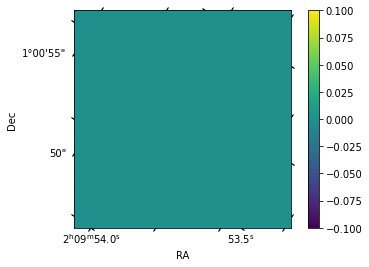

In [9]:
im = hdu[0].data
w = wcs.WCS(hdu[0].header)
plt.subplot(111, projection=w)
plt.imshow(im)
plt.xlabel("RA")
plt.ylabel("Dec")
plt.colorbar()

In [11]:
coords = SkyCoord( ra = hdu[0].header['CRVAL1']*u.deg, dec=hdu[0].header['CRVAL2']*u.deg)

### Can fit a circular aperture to the detection to get the line image S/N relative to sky background in an annulus around the detection

Signal-to-noise in circular aperture is   nan


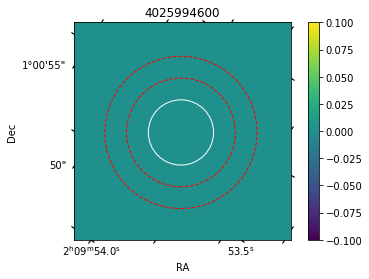

In [12]:
flux, flux_err, bkg_stddev, apcor = fit_circular_aperture(hdu, coords, 
                                                          radius=3*u.arcsec, 
                                                          annulus=[5,7]*u.arcsec,
                                                          plot=True, plottitle=str(detectid))
print('Signal-to-noise in circular aperture is {:5.3f}'.format(flux/bkg_stddev))

To save the datacube:

In [13]:
hdu.writeto('{}_line_flux_map.fits'.format(detectid), overwrite=True)

## For make_narrowband_image Options:

In [9]:
help(make_narrowband_image)

Help on function make_narrowband_image in module hetdex_tools.interpolate:

make_narrowband_image(detectid=None, coords=None, shotid=None, pixscale=<Quantity 0.25 arcsec>, imsize=<Quantity 30. arcsec>, wave_range=None, convolve_image=False, ffsky=True, subcont=False, dcont=50.0, include_error=False, survey='hdr4', extract_class=None, fiber_flux_offset=None, interp_kind='linear', apply_mask=True)
    Function to make narrowband image from either a detectid or from a
    coordinate/shotid combination.
    
    Paramaters
    ----------
    detectid: int
        detectid from the continuum or lines catalog. Default is
        None. Provide a coords/shotid combo if this isn't given
    coords: SkyCoords object
        coordinates to define the centre of the data cube
    pixscale: astropy angle quantity
         plate scale
    imsize: astropy angle quantity
        image size
    wave_range: list or None
        start and stop value for the wavelength range in Angstrom.
        If not giv